## Milestone 3: Beyond Descriptive Stats

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

from collections import Counter
from wordcloud import WordCloud

In [2]:
# Import Yelp dataset

file_path = 'csv file path'
df = pd.read_csv(file_path)

In [3]:
# Get the number of reviews by each rating stars

a1 = pysqldf("""SELECT stars, SUM(review_count) as review_count
        FROM df
        GROUP BY stars
        ORDER BY review_count DESC
        """)
a1

,stars,review_count
0,4.5,81885190
1,4.0,63937405
2,3.5,8069977
3,5.0,1693202
4,3.0,1603069
5,2.5,1172676
6,2.0,500721
7,1.5,439812
8,1.0,63987


Text(0.5, 1.0, 'Count of Reviews by Ratings')

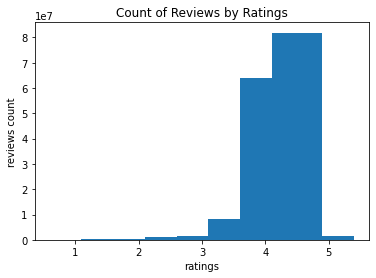

In [6]:
# Plot distribution of review ratings against the number of reviews
x = a1.stars
y = a1.review_count

plt.bar(x,y,align='center')
plt.xlabel('ratings')
plt.ylabel('reviews count')
plt.title('Count of Reviews by Ratings')

In [19]:
# List the cities with average review rating

pysqldf("""SELECT city, AVG(review_stars) as avg_rating, COUNT(*) as total_review
        FROM df
        GROUP BY city
        HAVING total_review > 500
        ORDER BY avg_rating
        """)

,city,avg_rating,total_review
0,Bryn Mawr,3.089744,624
1,Brandon,3.356757,925
2,Plant City,3.471795,585
3,Brentwood,3.477364,1502
4,Gretna,3.479032,620
...,...,...,...
61,Media,4.185567,1164
62,Saint Petersburg,4.317308,7904
63,Clayton,4.356338,710
64,Madeira Beach,4.389573,1055


In [22]:
# List the coffee company popular operating hour

pd.set_option('display.max_colwidth', None)
pysqldf("""SELECT hours, AVG(stars) as avg_rating, SUM(review_count) as review_count
        FROM df
        GROUP BY hours
        ORDER BY review_count DESC, avg_rating DESC
        LIMIT 5
        """)

,hours,avg_rating,review_count
0,"{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', 'Wednesday': '8:0-18:0', 'Thursday': '8:0-18:0', 'Friday': '8:0-18:0', 'Saturday': '8:0-18:0', 'Sunday': '8:0-18:0'}",4.440349,33318333
1,"{'Monday': '0:0-0:0', 'Tuesday': '7:0-15:0', 'Wednesday': '7:0-15:0', 'Thursday': '7:0-15:0', 'Friday': '7:0-17:0', 'Saturday': '7:0-17:0', 'Sunday': '7:0-15:0'}",4.000000,7316736
2,"{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', 'Wednesday': '7:0-21:0', 'Thursday': '7:0-21:0', 'Friday': '7:0-21:0', 'Saturday': '7:0-21:0', 'Sunday': '7:0-21:0'}",4.172897,4480866
3,"{'Monday': '12:0-0:0', 'Tuesday': '11:0-23:45', 'Wednesday': '12:0-0:0', 'Thursday': '12:0-0:0', 'Friday': '12:0-0:0', 'Saturday': '12:0-0:0', 'Sunday': '12:0-0:0'}",4.000000,4330200
4,"{'Monday': '8:0-14:0', 'Tuesday': '8:0-14:0', 'Wednesday': '8:0-14:0', 'Thursday': '8:0-14:0', 'Friday': '8:0-14:0', 'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}",4.090698,4288555


In [25]:
pd.reset_option('display.max_colwidth')
df.text.head()

0    This is nice little Chinese bakery in the hear...
1    This is the bakery I usually go to in Chinatow...
2    A delightful find in Chinatown! Very clean, an...
3    I ordered a graduation cake for my niece and i...
4    HK-STYLE MILK TEA:  FOUR STARS\n\nNot quite su...
Name: text, dtype: object

In [51]:
# Get list of english stopwords (ref: https://gist.github.com/sebleier/554280)

stopwords = [
    'i',
    'me',
    'my',
    'myself',
    'we',
    'our',
    'ours',
    'ourselves',
    'you',
    'your',
    'yours',
    'yourself',
    'yourselves',
    'he',
    'him',
    'his',
    'himself',
    'she',
    'her',
    'hers',
    'herself',
    'it',
    'its',
    'itself',
    'they',
    'them',
    'their',
    'theirs',
    'themselves',
    'what',
    'which',
    'who',
    'whom',
    'this',
    'that',
    'these',
    'those',
    'am',
    'is',
    'are',
    'was',
    'were',
    'be',
    'been',
    'being',
    'have',
    'has',
    'had',
    'having',
    'do',
    'does',
    'did',
    'doing',
    'a',
    'an',
    'the',
    'and',
    'but',
    'if',
    'or',
    'because',
    'as',
    'until',
    'while',
    'of',
    'at',
    'by',
    'for',
    'with',
    'about',
    'against',
    'between',
    'into',
    'through',
    'during',
    'before',
    'after',
    'above',
    'below',
    'to',
    'from',
    'up',
    'down',
    'in',
    'out',
    'on',
    'off',
    'over',
    'under',
    'again',
    'further',
    'then',
    'once',
    'here',
    'there',
    'when',
    'where',
    'why',
    'how',
    'all',
    'any',
    'both',
    'each',
    'few',
    'more',
    'most',
    'other',
    'some',
    'such',
    'no',
    'nor',
    'not',
    'only',
    'own',
    'same',
    'so',
    'than',
    'too',
    'very',
    's',
    't',
    'can',
    'will',
    'just',
    'don',
    'should',
    'now',
    '&amp;',
    '',
    '_',
    'back',
    'got',
    'go',
    'really',
    'one',
    "it's",
    'would',
    'also',
    "i've",
    "i'm",
    'get',
    '-',
    "don't",
    'even',
    'said',
    'asked',
    'went',
    'us',
    'like',
    'ordered',
    'good',
    'two'
]

sw_df = pd.DataFrame(stopwords, columns=['stopword'])

In [39]:
# Separate dataset into two dataframe, one with ratings >= 4, one with ratings < 3
high_rating_review = pysqldf("""SELECT text, review_stars
                                FROM df
                                WHERE review_stars >= 4
                                """)

low_rating_review = pysqldf("""SELECT text, review_stars
                                FROM df
                                WHERE review_stars < 3
                                """)


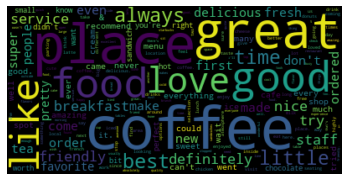

In [45]:
# Word Frequency for high rating reviews

no_sw = high_rating_review.text.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stopwords])

corpus = []
for ea in no_sw:
    corpus += ea
wordDict = Counter(corpus)

# To display in table form
# [ (k,v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)][:20]

# Use wordcloud package to represent words in visual
wordcloud = WordCloud().generate_from_frequencies(wordDict)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

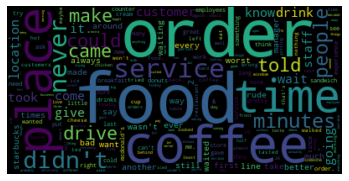

In [53]:
# Word Frequency for low rating reviews
no_sw = low_rating_review.text.apply(lambda word: [word.lower() for word in word.split(' ') if word.lower() not in stopwords])

corpus = []
for ea in no_sw:
    corpus += ea
wordDict = Counter(corpus)

# To display in table form
# [ (k,v) for k, v in sorted(wordDict.items(), key=lambda item: item[1], reverse=True)][:20]

# Use wordcloud package to represent words in visual
wordcloud = WordCloud().generate_from_frequencies(wordDict)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()